In [254]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Using the pandas bulitin info function to check whether there are any null values in dataset's 

In [255]:
#Reading mood.csv file
data_mood = pd.read_csv("mood.csv")
data_mood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
date     56 non-null int64
value    56 non-null int64
dtypes: int64(2)
memory usage: 976.0 bytes


In [256]:
#reading rumination_stress.csv file
data_ruminatory = pd.read_csv("ruminatory_stress.csv")
data_ruminatory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
date     29 non-null int64
value    29 non-null int64
dtypes: int64(2)
memory usage: 544.0 bytes


In [257]:
#reading sleep.csv file
data_sleep = pd.read_csv("sleep.csv")
data_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
date     29 non-null int64
value    29 non-null int64
dtypes: int64(2)
memory usage: 544.0 bytes


In [258]:
#reading stress.csv file
data_stress = pd.read_csv("stress.csv")
data_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
date     29 non-null int64
value    29 non-null int64
dtypes: int64(2)
memory usage: 544.0 bytes


# Checking the head of the dataset's and also checking the type of columns

checking for mood dataset

In [259]:
data_mood.head(5)

,date,value
0,1520858792,3
1,1520880226,3
2,1520881594,3
3,1520948995,3
4,1520966638,3


In [260]:
data_mood.dtypes

date     int64
value    int64
dtype: object

Checking for rumination dataset

In [261]:
data_ruminatory.head(5)

,date,value
0,1520899320,5
1,1520985923,4
2,1521072100,4
3,1521245083,2
4,1521331330,5


In [262]:
data_ruminatory.dtypes

date     int64
value    int64
dtype: object

checking for sleep dataset

In [263]:
data_sleep.head(5)

,date,value
0,1520858792,3
1,1520948995,4
2,1521029644,3
3,1521116050,3
4,1521201732,3


In [264]:
data_ruminatory.dtypes

date     int64
value    int64
dtype: object

checking for stress dataset

In [265]:
data_stress.head(5)

,date,value
0,1520899320,4
1,1520985923,5
2,1521072100,3
3,1521245083,3
4,1521331330,4


In [266]:
data_stress.dtypes

date     int64
value    int64
dtype: object

# The date column timestamp in the datasets is of type integer and it is in seconds I'm writing a function to convert timestamp in seconds to datetime format

In [267]:
#function to convert timestamp in seconds to datetime format
def convert_datetime(time_in_seconds):
    return pd.to_datetime(time_in_seconds, unit ='s')

In [268]:
# example just checking whether my function is working or not
convert_datetime(1521829083)

Timestamp('2018-03-23 18:18:03')

# Converting mood dataset date column in seconds to date_time

In [269]:
#converting mood.csvfile timestamp in seconds to datetime
data_mood['date'] = data_mood['date'].apply(convert_datetime)
#adding extra column weekday based on datetime format 0= monday, 6 = sunday
data_mood['weekday']=data_mood['date'].apply(pd.Timestamp.weekday)

In [270]:
data_mood.head(5)

,date,value,weekday
0,2018-03-12 12:46:32,3,0
1,2018-03-12 18:43:46,3,0
2,2018-03-12 19:06:34,3,0
3,2018-03-13 13:49:55,3,1
4,2018-03-13 18:43:58,3,1


Splitting datetime and into separate columns date and time

In [271]:
#splitting datetime column to separate date column and time column
data_mood['new_date'] = [d.date() for d in data_mood['date']]
data_mood['new_time'] = [d.time() for d in data_mood['date']]

In [272]:
data_mood.head(5)

,date,value,weekday,new_date,new_time
0,2018-03-12 12:46:32,3,0,2018-03-12,12:46:32
1,2018-03-12 18:43:46,3,0,2018-03-12,18:43:46
2,2018-03-12 19:06:34,3,0,2018-03-12,19:06:34
3,2018-03-13 13:49:55,3,1,2018-03-13,13:49:55
4,2018-03-13 18:43:58,3,1,2018-03-13,18:43:58


In [273]:
#renaming the name of the column value in mood datset to mood_ratings
data_mood.rename(index=str, columns={"value": "mood_ratings"}, inplace = True)

In [274]:
#checking for the frequency of mood_ratings in the  mood data_set
data_mood['mood_ratings'].value_counts()

3    35
4    16
2     3
5     1
1     1
Name: mood_ratings, dtype: int64

In [275]:
#sorting by new_date column
data_mood.sort_values(by = ['new_date'])

,date,mood_ratings,weekday,new_date,new_time
0,2018-03-12 12:46:32,3,0,2018-03-12,12:46:32
1,2018-03-12 18:43:46,3,0,2018-03-12,18:43:46
2,2018-03-12 19:06:34,3,0,2018-03-12,19:06:34
3,2018-03-13 13:49:55,3,1,2018-03-13,13:49:55
4,2018-03-13 18:43:58,3,1,2018-03-13,18:43:58
5,2018-03-14 12:14:04,3,2,2018-03-14,12:14:04
6,2018-03-14 19:00:24,3,2,2018-03-14,19:00:24
7,2018-03-14 22:04:08,3,2,2018-03-14,22:04:08
8,2018-03-15 12:14:10,3,3,2018-03-15,12:14:10
9,2018-03-15 18:00:38,1,3,2018-03-15,18:00:38


In [276]:
#checking the frequency of the dates how many times they entered the values
data_mood['new_date'].value_counts()

2018-03-21    6
2018-03-26    4
2018-03-14    3
2018-03-12    3
2018-03-23    3
2018-03-16    2
2018-06-18    2
2018-06-22    2
2018-03-17    2
2018-03-13    2
2018-03-22    2
2018-03-19    2
2018-03-18    2
2018-03-15    2
2018-03-29    2
2018-06-20    2
2018-03-24    1
2018-06-23    1
2018-07-22    1
2018-07-21    1
2018-05-11    1
2018-04-03    1
2018-05-15    1
2018-06-19    1
2018-04-30    1
2018-03-30    1
2018-03-31    1
2018-06-07    1
2018-07-09    1
2018-03-20    1
2018-06-21    1
Name: new_date, dtype: int64

In [277]:
data_mood.head()

,date,mood_ratings,weekday,new_date,new_time
0,2018-03-12 12:46:32,3,0,2018-03-12,12:46:32
1,2018-03-12 18:43:46,3,0,2018-03-12,18:43:46
2,2018-03-12 19:06:34,3,0,2018-03-12,19:06:34
3,2018-03-13 13:49:55,3,1,2018-03-13,13:49:55
4,2018-03-13 18:43:58,3,1,2018-03-13,18:43:58


# From the above frequency of dates I'm thinking there might be duplicate entries user also entered multiple entries on same at different timings

In [278]:
# dropping the columns date, new_time
data_mood.drop(['date','new_time','weekday'],axis =1,inplace=True)

The reason that i dropped the time_column is the user entered at different times i also wanted to analyze the date first as per date with only first enter rating

In [279]:
data_mood.head()

,mood_ratings,new_date
0,3,2018-03-12
1,3,2018-03-12
2,3,2018-03-12
3,3,2018-03-13
4,3,2018-03-13


In [280]:
# dropping duplicate rows
data_mood.drop_duplicates(subset='new_date',inplace=True)

In [281]:
#Changing the datatype to data_time to sort the values by date
pd.to_datetime(data_mood.new_date)
data_mood.sort_values(by = 'new_date')

,mood_ratings,new_date
0,3,2018-03-12
3,3,2018-03-13
5,3,2018-03-14
8,3,2018-03-15
10,3,2018-03-16
12,4,2018-03-17
14,4,2018-03-18
16,2,2018-03-19
18,3,2018-03-20
19,4,2018-03-21


In [282]:
data_mood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 55
Data columns (total 2 columns):
mood_ratings    31 non-null int64
new_date        31 non-null object
dtypes: int64(1), object(1)
memory usage: 744.0+ bytes


In [283]:
data_mood['new_date'].value_counts()

2018-03-16    1
2018-03-17    1
2018-07-21    1
2018-06-23    1
2018-03-26    1
2018-03-12    1
2018-07-22    1
2018-06-22    1
2018-05-11    1
2018-03-14    1
2018-03-24    1
2018-06-20    1
2018-05-15    1
2018-06-19    1
2018-04-30    1
2018-04-03    1
2018-03-30    1
2018-03-31    1
2018-06-07    1
2018-06-18    1
2018-07-09    1
2018-03-13    1
2018-03-22    1
2018-03-23    1
2018-03-21    1
2018-03-19    1
2018-03-18    1
2018-03-20    1
2018-03-15    1
2018-03-29    1
2018-06-21    1
Name: new_date, dtype: int64

Now I turned down to 31 entries from 55 entries 

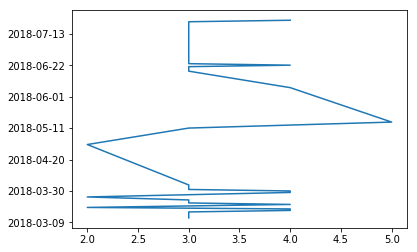

In [284]:
plt.plot(data_mood['mood_ratings'],data_mood['new_date'])

# Repeating the above steps to rumination data set

In [285]:
#converting rumination.csvfile timestamp in seconds to datetime
data_ruminatory['date'] = data_ruminatory['date'].apply(convert_datetime)
#adding extra column weekday based on datetime format 0= monday, 6 = sunday
data_ruminatory['weekday']=data_ruminatory['date'].apply(pd.Timestamp.weekday)

In [286]:
data_ruminatory.head(5)

,date,value,weekday
0,2018-03-13 00:02:00,5,1
1,2018-03-14 00:05:23,4,2
2,2018-03-15 00:01:40,4,3
3,2018-03-17 00:04:43,2,5
4,2018-03-18 00:02:10,5,6


In [287]:
#splitting datetime column to separate date column and time column
data_ruminatory['new_date'] = [d.date() for d in data_ruminatory['date']]
data_ruminatory['new_time'] = [d.time() for d in data_ruminatory['date']]

In [288]:
data_ruminatory.head()

,date,value,weekday,new_date,new_time
0,2018-03-13 00:02:00,5,1,2018-03-13,00:02:00
1,2018-03-14 00:05:23,4,2,2018-03-14,00:05:23
2,2018-03-15 00:01:40,4,3,2018-03-15,00:01:40
3,2018-03-17 00:04:43,2,5,2018-03-17,00:04:43
4,2018-03-18 00:02:10,5,6,2018-03-18,00:02:10


In [289]:
#renaming the name of the column value in rumination datset to rumination_ratings
data_ruminatory.rename(index=str, columns={"value": "rumination_ratings"}, inplace = True)

In [290]:
#checking for the frequency of rumination_ratings in the rumination data_set
data_ruminatory['rumination_ratings'].value_counts()

5    23
4     4
2     2
Name: rumination_ratings, dtype: int64

Looks like most of the patients are having a trouble letting go of something that
happened today?

In [291]:
#sorting by new_date column
data_ruminatory.sort_values(by = ['new_date'])

,date,rumination_ratings,weekday,new_date,new_time
0,2018-03-13 00:02:00,5,1,2018-03-13,00:02:00
1,2018-03-14 00:05:23,4,2,2018-03-14,00:05:23
2,2018-03-15 00:01:40,4,3,2018-03-15,00:01:40
3,2018-03-17 00:04:43,2,5,2018-03-17,00:04:43
4,2018-03-18 00:02:10,5,6,2018-03-18,00:02:10
5,2018-03-19 00:30:58,5,0,2018-03-19,00:30:58
6,2018-03-20 00:00:27,5,1,2018-03-20,00:00:27
7,2018-03-21 00:07:18,5,2,2018-03-21,00:07:18
8,2018-03-22 00:02:01,5,3,2018-03-22,00:02:01
9,2018-03-23 00:24:01,5,4,2018-03-23,00:24:01


In [292]:
#checking the frequency of the dates how many times they entered the values
data_ruminatory['new_date'].value_counts()

2018-03-26    6
2018-03-14    1
2018-03-21    1
2018-07-09    1
2018-06-20    1
2018-06-23    1
2018-06-14    1
2018-03-23    1
2018-03-22    1
2018-03-19    1
2018-04-01    1
2018-03-28    1
2018-03-24    1
2018-06-19    1
2018-05-24    1
2018-03-18    1
2018-03-20    1
2018-03-31    1
2018-03-17    1
2018-03-15    1
2018-03-30    1
2018-03-13    1
2018-04-30    1
2018-03-27    1
Name: new_date, dtype: int64

user entered the information only mostly once all days but enterted 6 times on 2018-03-26

In [293]:
data_ruminatory.head()

,date,rumination_ratings,weekday,new_date,new_time
0,2018-03-13 00:02:00,5,1,2018-03-13,00:02:00
1,2018-03-14 00:05:23,4,2,2018-03-14,00:05:23
2,2018-03-15 00:01:40,4,3,2018-03-15,00:01:40
3,2018-03-17 00:04:43,2,5,2018-03-17,00:04:43
4,2018-03-18 00:02:10,5,6,2018-03-18,00:02:10


In [294]:
# dropping the columns date, new_time
data_ruminatory.drop(['date','new_time','weekday'],axis =1,inplace=True)

In [295]:
data_ruminatory.head()

,rumination_ratings,new_date
0,5,2018-03-13
1,4,2018-03-14
2,4,2018-03-15
3,2,2018-03-17
4,5,2018-03-18


In [296]:
# dropping duplicate rows by new_date column
data_ruminatory.drop_duplicates(subset='new_date',inplace=True)

In [297]:
#Changing the datatype to data_time to sort the values by date
pd.to_datetime(data_ruminatory.new_date)
data_ruminatory.sort_values(by = 'new_date')

,rumination_ratings,new_date
0,5,2018-03-13
1,4,2018-03-14
2,4,2018-03-15
3,2,2018-03-17
4,5,2018-03-18
5,5,2018-03-19
6,5,2018-03-20
7,5,2018-03-21
8,5,2018-03-22
9,5,2018-03-23


In [298]:
data_ruminatory.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 28
Data columns (total 2 columns):
rumination_ratings    24 non-null int64
new_date              24 non-null object
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


In [299]:
data_ruminatory['new_date'].value_counts()

2018-03-14    1
2018-06-19    1
2018-07-09    1
2018-06-20    1
2018-06-23    1
2018-06-14    1
2018-03-23    1
2018-03-22    1
2018-03-19    1
2018-04-01    1
2018-03-28    1
2018-03-21    1
2018-03-24    1
2018-05-24    1
2018-03-18    1
2018-03-20    1
2018-03-31    1
2018-03-17    1
2018-03-15    1
2018-03-30    1
2018-03-26    1
2018-03-13    1
2018-04-30    1
2018-03-27    1
Name: new_date, dtype: int64

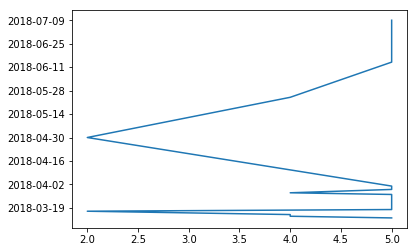

In [300]:
plt.plot(data_ruminatory['rumination_ratings'],data_ruminatory['new_date'])

# Repeating the above steps for sleep data set

In [301]:
#converting sleep.csvfile timestamp in seconds to datetime
data_sleep['date'] = data_sleep['date'].apply(convert_datetime)
#adding extra column weekday based on datetime format 0= monday, 6 = sunday
data_sleep['weekday']=data_sleep['date'].apply(pd.Timestamp.weekday)

In [302]:
data_sleep.head(5)

,date,value,weekday
0,2018-03-12 12:46:32,3,0
1,2018-03-13 13:49:55,4,1
2,2018-03-14 12:14:04,3,2
3,2018-03-15 12:14:10,3,3
4,2018-03-16 12:02:12,3,4


In [303]:
#splitting datetime column to separate date column and time column
data_sleep['new_date'] = [d.date() for d in data_sleep['date']]
data_sleep['new_time'] = [d.time() for d in data_sleep['date']]

In [304]:
data_sleep.head()

,date,value,weekday,new_date,new_time
0,2018-03-12 12:46:32,3,0,2018-03-12,12:46:32
1,2018-03-13 13:49:55,4,1,2018-03-13,13:49:55
2,2018-03-14 12:14:04,3,2,2018-03-14,12:14:04
3,2018-03-15 12:14:10,3,3,2018-03-15,12:14:10
4,2018-03-16 12:02:12,3,4,2018-03-16,12:02:12


In [305]:
#renaming the name of the column value in sleep datset to sleep_ratings
data_sleep.rename(index=str, columns={"value": "sleep_ratings"}, inplace = True)

In [306]:
#checking for the frequency of sleep_ratings in the sleep data_set
data_sleep['sleep_ratings'].value_counts()

3    16
4    13
Name: sleep_ratings, dtype: int64

Looks like people are getting enough sleep

In [307]:
#sorting by new_date column
data_sleep.sort_values(by = ['new_date'])

,date,sleep_ratings,weekday,new_date,new_time
0,2018-03-12 12:46:32,3,0,2018-03-12,12:46:32
1,2018-03-13 13:49:55,4,1,2018-03-13,13:49:55
2,2018-03-14 12:14:04,3,2,2018-03-14,12:14:04
3,2018-03-15 12:14:10,3,3,2018-03-15,12:14:10
4,2018-03-16 12:02:12,3,4,2018-03-16,12:02:12
5,2018-03-17 12:02:59,4,5,2018-03-17,12:02:59
6,2018-03-18 12:20:29,4,6,2018-03-18,12:20:29
7,2018-03-19 12:00:24,3,0,2018-03-19,12:00:24
8,2018-03-20 12:07:10,3,1,2018-03-20,12:07:10
9,2018-03-21 13:09:11,4,2,2018-03-21,13:09:11


In [308]:
#checking the frequency of the dates how many times they entered the values
data_sleep['new_date'].value_counts()

2018-03-21    5
2018-03-14    1
2018-03-24    1
2018-06-07    1
2018-06-22    1
2018-06-18    1
2018-03-23    1
2018-07-22    1
2018-03-22    1
2018-03-19    1
2018-03-12    1
2018-05-11    1
2018-06-20    1
2018-06-23    1
2018-03-29    1
2018-03-18    1
2018-03-20    1
2018-03-17    1
2018-03-15    1
2018-03-30    1
2018-03-26    1
2018-03-13    1
2018-05-15    1
2018-03-16    1
2018-07-09    1
Name: new_date, dtype: int64

Only one day user has entered 5 times 

In [309]:
data_sleep.head()

,date,sleep_ratings,weekday,new_date,new_time
0,2018-03-12 12:46:32,3,0,2018-03-12,12:46:32
1,2018-03-13 13:49:55,4,1,2018-03-13,13:49:55
2,2018-03-14 12:14:04,3,2,2018-03-14,12:14:04
3,2018-03-15 12:14:10,3,3,2018-03-15,12:14:10
4,2018-03-16 12:02:12,3,4,2018-03-16,12:02:12


In [310]:
# dropping the columns date, new_time
data_sleep.drop(['date','new_time','weekday'],axis =1,inplace=True)

In [311]:
data_sleep.head()

,sleep_ratings,new_date
0,3,2018-03-12
1,4,2018-03-13
2,3,2018-03-14
3,3,2018-03-15
4,3,2018-03-16


In [312]:
# dropping duplicate rows by new_date column
data_sleep.drop_duplicates(subset='new_date',inplace=True)

In [313]:
#Changing the datatype to data_time to sort the values by date
pd.to_datetime(data_sleep.new_date)
data_sleep.sort_values(by = 'new_date')

,sleep_ratings,new_date
0,3,2018-03-12
1,4,2018-03-13
2,3,2018-03-14
3,3,2018-03-15
4,3,2018-03-16
5,4,2018-03-17
6,4,2018-03-18
7,3,2018-03-19
8,3,2018-03-20
9,4,2018-03-21


In [314]:
data_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 28
Data columns (total 2 columns):
sleep_ratings    25 non-null int64
new_date         25 non-null object
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes


In [315]:
data_sleep['new_date'].value_counts()

2018-03-14    1
2018-03-24    1
2018-06-07    1
2018-06-22    1
2018-06-18    1
2018-03-23    1
2018-07-22    1
2018-03-22    1
2018-03-19    1
2018-03-12    1
2018-05-11    1
2018-03-21    1
2018-06-20    1
2018-06-23    1
2018-03-29    1
2018-03-18    1
2018-03-20    1
2018-03-17    1
2018-03-15    1
2018-03-30    1
2018-03-26    1
2018-03-13    1
2018-05-15    1
2018-03-16    1
2018-07-09    1
Name: new_date, dtype: int64

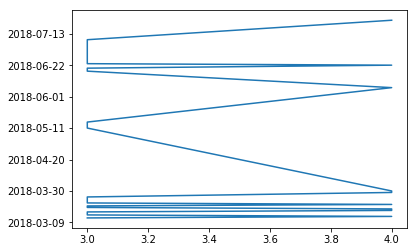

In [316]:
plt.plot(data_sleep['sleep_ratings'],data_sleep['new_date'])

# Repeating the above steps for stress dataset

In [317]:
#converting stress.csvfile timestamp in seconds to datetime
data_stress['date'] = data_stress['date'].apply(convert_datetime)
#adding extra column weekday based on datetime format 0= monday, 6 = sunday
data_stress['weekday']=data_stress['date'].apply(pd.Timestamp.weekday)

In [318]:
data_stress.head(5)

,date,value,weekday
0,2018-03-13 00:02:00,4,1
1,2018-03-14 00:05:23,5,2
2,2018-03-15 00:01:40,3,3
3,2018-03-17 00:04:43,3,5
4,2018-03-18 00:02:10,4,6


In [319]:
#splitting datetime column to separate date column and time column
data_stress['new_date'] = [d.date() for d in data_stress['date']]
data_stress['new_time'] = [d.time() for d in data_stress['date']]

In [320]:
data_stress.head()

,date,value,weekday,new_date,new_time
0,2018-03-13 00:02:00,4,1,2018-03-13,00:02:00
1,2018-03-14 00:05:23,5,2,2018-03-14,00:05:23
2,2018-03-15 00:01:40,3,3,2018-03-15,00:01:40
3,2018-03-17 00:04:43,3,5,2018-03-17,00:04:43
4,2018-03-18 00:02:10,4,6,2018-03-18,00:02:10


In [321]:
#renaming the name of the column value in stress datset to stress_ratings
data_stress.rename(index=str, columns={"value": "stress_ratings"}, inplace = True)

In [322]:
#checking for the frequency of stress_ratings in the stress data_set
data_stress['stress_ratings'].value_counts()

3    17
4     5
5     4
2     2
1     1
Name: stress_ratings, dtype: int64

Looks Like most of the people are having stress

In [323]:
#sorting by new_date column
data_stress.sort_values(by = ['new_date'])

,date,stress_ratings,weekday,new_date,new_time
0,2018-03-13 00:02:00,4,1,2018-03-13,00:02:00
1,2018-03-14 00:05:23,5,2,2018-03-14,00:05:23
2,2018-03-15 00:01:40,3,3,2018-03-15,00:01:40
3,2018-03-17 00:04:43,3,5,2018-03-17,00:04:43
4,2018-03-18 00:02:10,4,6,2018-03-18,00:02:10
5,2018-03-19 00:30:58,3,0,2018-03-19,00:30:58
6,2018-03-20 00:00:27,5,1,2018-03-20,00:00:27
7,2018-03-21 00:07:18,4,2,2018-03-21,00:07:18
8,2018-03-22 00:02:01,3,3,2018-03-22,00:02:01
9,2018-03-23 00:24:01,4,4,2018-03-23,00:24:01


In [324]:
#checking the frequency of the dates how many times they entered the values
data_stress['new_date'].value_counts()

2018-03-26    6
2018-03-14    1
2018-03-21    1
2018-07-09    1
2018-06-20    1
2018-06-23    1
2018-06-14    1
2018-03-23    1
2018-03-22    1
2018-03-19    1
2018-04-01    1
2018-03-28    1
2018-03-24    1
2018-06-19    1
2018-05-24    1
2018-03-18    1
2018-03-20    1
2018-03-31    1
2018-03-17    1
2018-03-15    1
2018-03-30    1
2018-03-13    1
2018-04-30    1
2018-03-27    1
Name: new_date, dtype: int64

Looks like only one day person entered six times rest of the days entered only once

In [325]:
data_stress.head()

,date,stress_ratings,weekday,new_date,new_time
0,2018-03-13 00:02:00,4,1,2018-03-13,00:02:00
1,2018-03-14 00:05:23,5,2,2018-03-14,00:05:23
2,2018-03-15 00:01:40,3,3,2018-03-15,00:01:40
3,2018-03-17 00:04:43,3,5,2018-03-17,00:04:43
4,2018-03-18 00:02:10,4,6,2018-03-18,00:02:10


In [326]:
# dropping the columns date, new_time
data_stress.drop(['date','new_time','weekday'],axis =1,inplace=True)

In [327]:
data_stress.head()

,stress_ratings,new_date
0,4,2018-03-13
1,5,2018-03-14
2,3,2018-03-15
3,3,2018-03-17
4,4,2018-03-18


In [328]:
# dropping duplicate rows by new_date column
data_stress.drop_duplicates(subset='new_date',inplace=True)

In [329]:
data_stress.head()

,stress_ratings,new_date
0,4,2018-03-13
1,5,2018-03-14
2,3,2018-03-15
3,3,2018-03-17
4,4,2018-03-18


In [330]:
#Changing the datatype to data_time to sort the values by date
pd.to_datetime(data_stress.new_date)
data_stress.sort_values(by = 'new_date')

,stress_ratings,new_date
0,4,2018-03-13
1,5,2018-03-14
2,3,2018-03-15
3,3,2018-03-17
4,4,2018-03-18
5,3,2018-03-19
6,5,2018-03-20
7,4,2018-03-21
8,3,2018-03-22
9,4,2018-03-23


In [331]:
data_stress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 28
Data columns (total 2 columns):
stress_ratings    24 non-null int64
new_date          24 non-null object
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


In [332]:
data_stress['new_date'].value_counts()

2018-03-14    1
2018-06-19    1
2018-07-09    1
2018-06-20    1
2018-06-23    1
2018-06-14    1
2018-03-23    1
2018-03-22    1
2018-03-19    1
2018-04-01    1
2018-03-28    1
2018-03-21    1
2018-03-24    1
2018-05-24    1
2018-03-18    1
2018-03-20    1
2018-03-31    1
2018-03-17    1
2018-03-15    1
2018-03-30    1
2018-03-26    1
2018-03-13    1
2018-04-30    1
2018-03-27    1
Name: new_date, dtype: int64

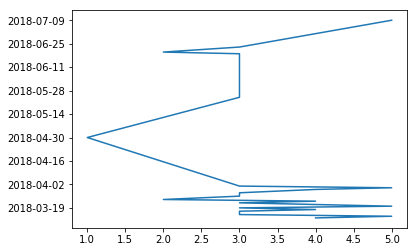

In [333]:
plt.plot(data_stress['stress_ratings'],data_stress['new_date'])

In [334]:
print(data_mood.shape)
print(data_ruminatory.shape)
print(data_sleep.shape)
print(data_stress.shape)

(31, 2)
(24, 2)
(25, 2)
(24, 2)


In [335]:
mood = data_mood.set_index(['new_date'])

In [336]:
mood.head()

,mood_ratings
new_date,
2018-03-12,3
2018-03-13,3
2018-03-14,3
2018-03-15,3
2018-03-16,3


In [337]:
mood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2018-03-12 to 2018-07-22
Data columns (total 1 columns):
mood_ratings    31 non-null int64
dtypes: int64(1)
memory usage: 496.0+ bytes


In [338]:
rumination = data_ruminatory.set_index(['new_date'])

In [339]:
rumination.head()

,rumination_ratings
new_date,
2018-03-13,5
2018-03-14,4
2018-03-15,4
2018-03-17,2
2018-03-18,5


In [340]:
rumination.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2018-03-13 to 2018-07-09
Data columns (total 1 columns):
rumination_ratings    24 non-null int64
dtypes: int64(1)
memory usage: 384.0+ bytes


In [341]:
sleep = data_sleep.set_index(['new_date'])

In [342]:
sleep.head()

,sleep_ratings
new_date,
2018-03-12,3
2018-03-13,4
2018-03-14,3
2018-03-15,3
2018-03-16,3


In [343]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2018-03-12 to 2018-07-22
Data columns (total 1 columns):
sleep_ratings    25 non-null int64
dtypes: int64(1)
memory usage: 400.0+ bytes


In [344]:
stress = data_stress.set_index(['new_date'])

In [345]:
stress.head()

,stress_ratings
new_date,
2018-03-13,4
2018-03-14,5
2018-03-15,3
2018-03-17,3
2018-03-18,4


In [346]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2018-03-13 to 2018-07-09
Data columns (total 1 columns):
stress_ratings    24 non-null int64
dtypes: int64(1)
memory usage: 384.0+ bytes


In [347]:
merged_dataset = pd.merge(pd.merge(pd.merge(data_mood, data_sleep, how='outer', on = 'new_date'), data_ruminatory, how="outer",on='new_date'),data_stress, how="outer", on='new_date')

In [348]:
merged_dataset

,mood_ratings,new_date,sleep_ratings,rumination_ratings,stress_ratings
0,3.0,2018-03-12,3.0,NaN,NaN
1,3.0,2018-03-13,4.0,5.0,4.0
2,3.0,2018-03-14,3.0,4.0,5.0
3,3.0,2018-03-15,3.0,4.0,3.0
4,3.0,2018-03-16,3.0,NaN,NaN
5,4.0,2018-03-17,4.0,2.0,3.0
6,4.0,2018-03-18,4.0,5.0,4.0
7,2.0,2018-03-19,3.0,5.0,3.0
8,3.0,2018-03-20,3.0,5.0,5.0
9,4.0,2018-03-21,4.0,5.0,4.0


In [349]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 5 columns):
mood_ratings          31 non-null float64
new_date              36 non-null object
sleep_ratings         25 non-null float64
rumination_ratings    24 non-null float64
stress_ratings        24 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB


In [350]:
merged_dataset = merged_dataset[['new_date','mood_ratings','sleep_ratings','rumination_ratings','stress_ratings']]

In [351]:
merged_dataset

,new_date,mood_ratings,sleep_ratings,rumination_ratings,stress_ratings
0,2018-03-12,3.0,3.0,NaN,NaN
1,2018-03-13,3.0,4.0,5.0,4.0
2,2018-03-14,3.0,3.0,4.0,5.0
3,2018-03-15,3.0,3.0,4.0,3.0
4,2018-03-16,3.0,3.0,NaN,NaN
5,2018-03-17,4.0,4.0,2.0,3.0
6,2018-03-18,4.0,4.0,5.0,4.0
7,2018-03-19,2.0,3.0,5.0,3.0
8,2018-03-20,3.0,3.0,5.0,5.0
9,2018-03-21,4.0,4.0,5.0,4.0


In [352]:
merged_dataset.describe()

,mood_ratings,sleep_ratings,rumination_ratings,stress_ratings
count,31.000000,25.000000,24.000000,24.000000
mean,3.225806,3.360000,4.583333,3.375000
std,0.668814,0.489898,0.880547,1.013496
min,2.000000,3.000000,2.000000,1.000000
25%,3.000000,3.000000,4.750000,3.000000
50%,3.000000,3.000000,5.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000
max,5.000000,4.000000,5.000000,5.000000


In [353]:
print("median of mood ratings",merged_dataset['mood_ratings'].median())
print("median of sleep ratings",merged_dataset['sleep_ratings'].median())
print("median of rumination ratings",merged_dataset['rumination_ratings'].median())
print("median of stress ratings",merged_dataset['stress_ratings'].median())

median of mood ratings 3.0
median of sleep ratings 3.0
median of rumination ratings 5.0
median of stress ratings 3.0


In [354]:
#replacing the null values with median of columns
merged_dataset['mood_ratings'].fillna(value=merged_dataset['mood_ratings'].median(), inplace=True)
merged_dataset['sleep_ratings'].fillna(value=merged_dataset['sleep_ratings'].median(), inplace=True)
merged_dataset['rumination_ratings'].fillna(value=merged_dataset['rumination_ratings'].median(), inplace=True)
merged_dataset['stress_ratings'].fillna(value=merged_dataset['stress_ratings'].median(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [355]:
merged_dataset

,new_date,mood_ratings,sleep_ratings,rumination_ratings,stress_ratings
0,2018-03-12,3.0,3.0,5.0,3.0
1,2018-03-13,3.0,4.0,5.0,4.0
2,2018-03-14,3.0,3.0,4.0,5.0
3,2018-03-15,3.0,3.0,4.0,3.0
4,2018-03-16,3.0,3.0,5.0,3.0
5,2018-03-17,4.0,4.0,2.0,3.0
6,2018-03-18,4.0,4.0,5.0,4.0
7,2018-03-19,2.0,3.0,5.0,3.0
8,2018-03-20,3.0,3.0,5.0,5.0
9,2018-03-21,4.0,4.0,5.0,4.0


In [356]:
#correlation betweeen differnt ratings
merged_dataset.corr()

,mood_ratings,sleep_ratings,rumination_ratings,stress_ratings
mood_ratings,1.000000,0.651386,0.120089,0.176891
sleep_ratings,0.651386,1.000000,-0.043895,0.135394
rumination_ratings,0.120089,-0.043895,1.000000,0.298005
stress_ratings,0.176891,0.135394,0.298005,1.000000


# dropping the null values and checking the correlation between the parameters

In [357]:
#checking the correlation by dropping NULL Values
data_set = pd.merge(pd.merge(pd.merge(data_mood, data_sleep, how='outer', on = 'new_date'), data_ruminatory, how="outer",on='new_date'),data_stress, how="outer", on='new_date')
data_set.head()
data_set.dropna(inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 28
Data columns (total 5 columns):
mood_ratings          16 non-null float64
new_date              16 non-null object
sleep_ratings         16 non-null float64
rumination_ratings    16 non-null float64
stress_ratings        16 non-null float64
dtypes: float64(4), object(1)
memory usage: 768.0+ bytes


In [358]:
data_set.corr()

,mood_ratings,sleep_ratings,rumination_ratings,stress_ratings
mood_ratings,1.000000,0.759134,-0.322405,0.209447
sleep_ratings,0.759134,1.000000,-0.252382,0.171561
rumination_ratings,-0.322405,-0.252382,1.000000,0.070844
stress_ratings,0.209447,0.171561,0.070844,1.000000


In [359]:
#created a new column weekday 0 = monday, 6 = sunday
merged_dataset['weekday']=merged_dataset['new_date'].apply(pd.Timestamp.weekday)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Try to draw insights from the data using pandas cross_tab function

In [360]:
tab = pd.crosstab(index = merged_dataset['new_date'],columns=merged_dataset['weekday'],margins = True)

In [361]:
tab

weekday,0,1,2,3,4,5,6,All
new_date,,,,,,,,
2018-03-12,1,0,0,0,0,0,0,1
2018-03-13,0,1,0,0,0,0,0,1
2018-03-14,0,0,1,0,0,0,0,1
2018-03-15,0,0,0,1,0,0,0,1
2018-03-16,0,0,0,0,1,0,0,1
2018-03-17,0,0,0,0,0,1,0,1
2018-03-18,0,0,0,0,0,0,1,1
2018-03-19,1,0,0,0,0,0,0,1
2018-03-20,0,1,0,0,0,0,0,1


In [362]:
rumination_tab = pd.crosstab([merged_dataset['new_date'],merged_dataset['weekday']],merged_dataset['rumination_ratings'],margins = True)

In [363]:
rumination_tab

,rumination_ratings,2.0,4.0,5.0,All
new_date,weekday,,,,
2018-03-12,0,0,0,1,1
2018-03-13,1,0,0,1,1
2018-03-14,2,0,1,0,1
2018-03-15,3,0,1,0,1
2018-03-16,4,0,0,1,1
2018-03-17,5,1,0,0,1
2018-03-18,6,0,0,1,1
2018-03-19,0,0,0,1,1
2018-03-20,1,0,0,1,1


In [364]:
rumination_sleep_relation_tab = pd.crosstab(index = merged_dataset['rumination_ratings'],columns=merged_dataset['sleep_ratings'],margins = True)

In [365]:
rumination_sleep_relation_tab

sleep_ratings,3.0,4.0,All
rumination_ratings,,,
2.0,1,1,2
4.0,4,0,4
5.0,22,8,30
All,27,9,36


In [366]:
sleep_mood_relation_tab = pd.crosstab(index = merged_dataset['sleep_ratings'],columns=merged_dataset['mood_ratings'],margins = True)

In [367]:
sleep_mood_relation_tab

mood_ratings,2.0,3.0,4.0,5.0,All
sleep_ratings,,,,,
3.0,3,23,0,1,27
4.0,0,1,8,0,9
All,3,24,8,1,36


In [368]:
rumination_mood_relation_tab = pd.crosstab(index = merged_dataset['rumination_ratings'],columns=merged_dataset['mood_ratings'],margins = True)

In [369]:
rumination_mood_relation_tab

mood_ratings,2.0,3.0,4.0,5.0,All
rumination_ratings,,,,,
2.0,1,0,1,0,2
4.0,0,4,0,0,4
5.0,2,20,7,1,30
All,3,24,8,1,36


In [370]:
rumination_stress_relation_tab = pd.crosstab(index = merged_dataset['rumination_ratings'],columns=merged_dataset['stress_ratings'],margins = True)

In [371]:
rumination_stress_relation_tab 

stress_ratings,1.0,2.0,3.0,4.0,5.0,All
rumination_ratings,,,,,,
2.0,1,0,1,0,0,2
4.0,0,0,3,0,1,4
5.0,0,2,20,5,3,30
All,1,2,24,5,4,36


In [372]:
mood_stress_relation_tab = pd.crosstab(index = merged_dataset['stress_ratings'],columns=merged_dataset['mood_ratings'],margins = True)

In [373]:
mood_stress_relation_tab

mood_ratings,2.0,3.0,4.0,5.0,All
stress_ratings,,,,,
1.0,1,0,0,0,1
2.0,0,2,0,0,2
3.0,2,16,5,1,24
4.0,0,2,3,0,5
5.0,0,4,0,0,4
All,3,24,8,1,36


In [374]:
mood_stress_relation_tab = pd.crosstab(index = merged_dataset['stress_ratings'],columns=merged_dataset['mood_ratings'],margins = True)

In [375]:
sleep_stress_relation_tab

sleep_ratings,3.0,4.0,All
stress_ratings,,,
1.0,1,0,1
2.0,2,0,2
3.0,19,5,24
4.0,1,4,5
5.0,4,0,4
All,27,9,36


In [376]:
mood_stress__rumination_relation_tab = pd.crosstab([merged_dataset['rumination_ratings'],merged_dataset['stress_ratings']],columns=merged_dataset['mood_ratings'],margins = True)

In [377]:
mood_stress__rumination_relation_tab

mood_ratings                       2.0  3.0  4.0  5.0  All
rumination_ratings stress_ratings                         
2.0                1.0               1    0    0    0    1
                   3.0               0    0    1    0    1
4.0                3.0               0    3    0    0    3
                   5.0               0    1    0    0    1
5.0                2.0               0    2    0    0    2
                   3.0               2   13    4    1   20
                   4.0               0    2    3    0    5
                   5.0               0    3    0    0    3
All                                  3   24    8    1   36

In [378]:
sleep_mood_stress__rumination_relation_tab = pd.crosstab([merged_dataset['rumination_ratings'],merged_dataset['stress_ratings'],merged_dataset['mood_ratings']],columns=merged_dataset['sleep_ratings'],margins = True)

In [379]:
sleep_mood_stress__rumination_relation_tab

sleep_ratings                                   3.0  4.0  All
rumination_ratings stress_ratings mood_ratings               
2.0                1.0            2.0             1    0    1
                   3.0            4.0             0    1    1
4.0                3.0            3.0             3    0    3
                   5.0            3.0             1    0    1
5.0                2.0            3.0             2    0    2
                   3.0            2.0             2    0    2
                                  3.0            13    0   13
                                  4.0             0    4    4
                                  5.0             1    0    1
                   4.0            3.0             1    1    2
                                  4.0             0    3    3
                   5.0            3.0             3    0    3
All                                              27    9   36

# Visualisation

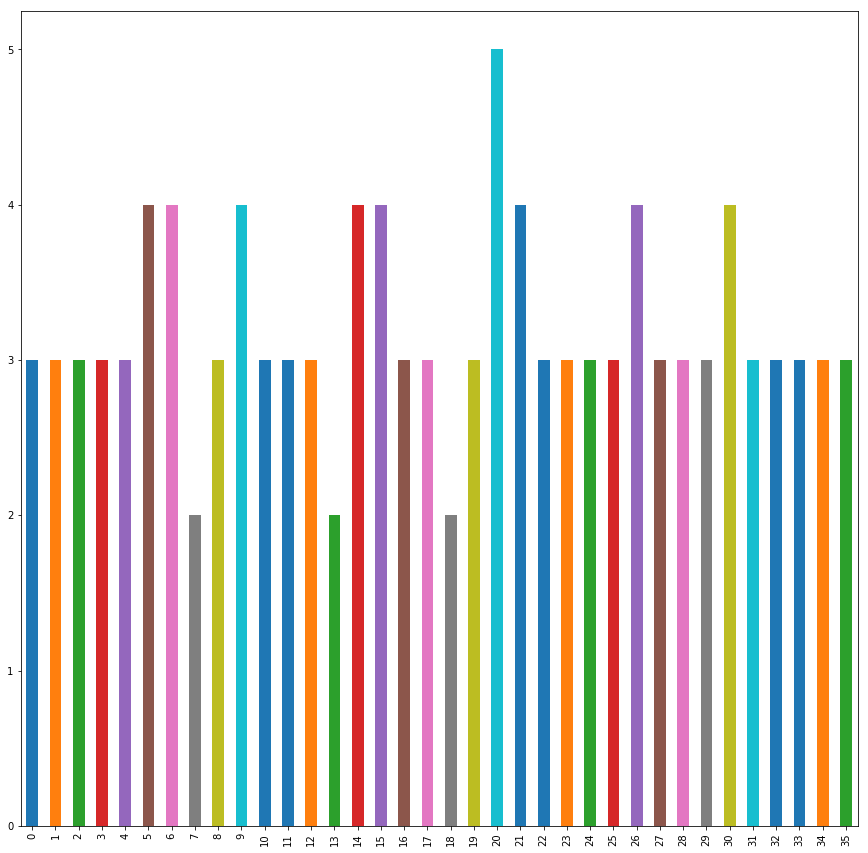

In [380]:
#bar chart of mood_ratings day by day
merged_dataset['mood_ratings'].plot(kind="bar", figsize=(15,15))

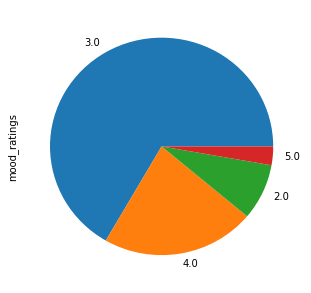

In [381]:
#pie chart of mood_ratings over a period of time
merged_dataset['mood_ratings'].value_counts().plot(kind="pie", figsize=(5,5))

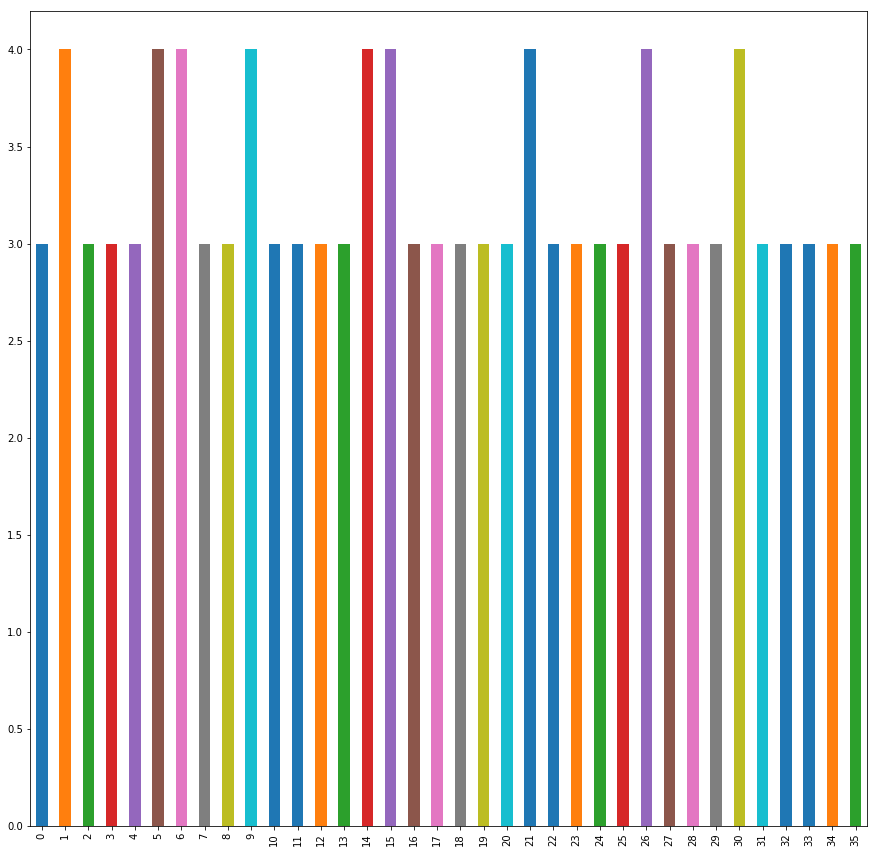

In [382]:
#bar chart of sleep_ratings day by day
merged_dataset['sleep_ratings'].plot(kind="bar", figsize=(15,15))

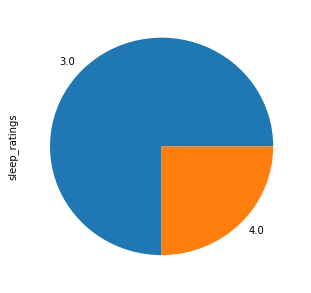

In [383]:
#pie chart of sleep_ratings over a period of time
merged_dataset['sleep_ratings'].value_counts().plot(kind="pie", figsize=(5,5))

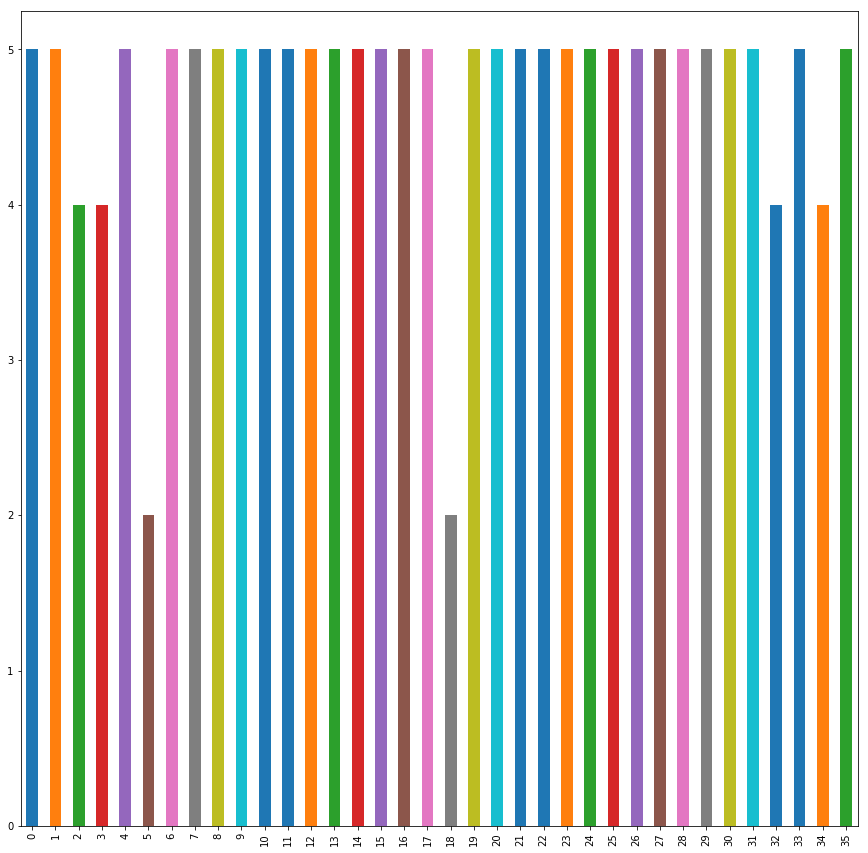

In [384]:
#bar chart of rumination_ratings day by day
merged_dataset['rumination_ratings'].plot(kind="bar", figsize=(15,15))

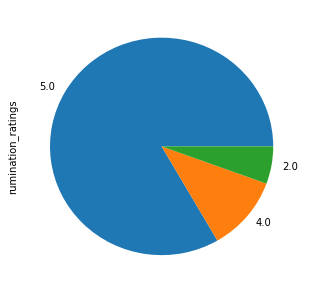

In [385]:
#pie chart of mood_ratings over a period of time
merged_dataset['rumination_ratings'].value_counts().plot(kind="pie", figsize=(5,5))

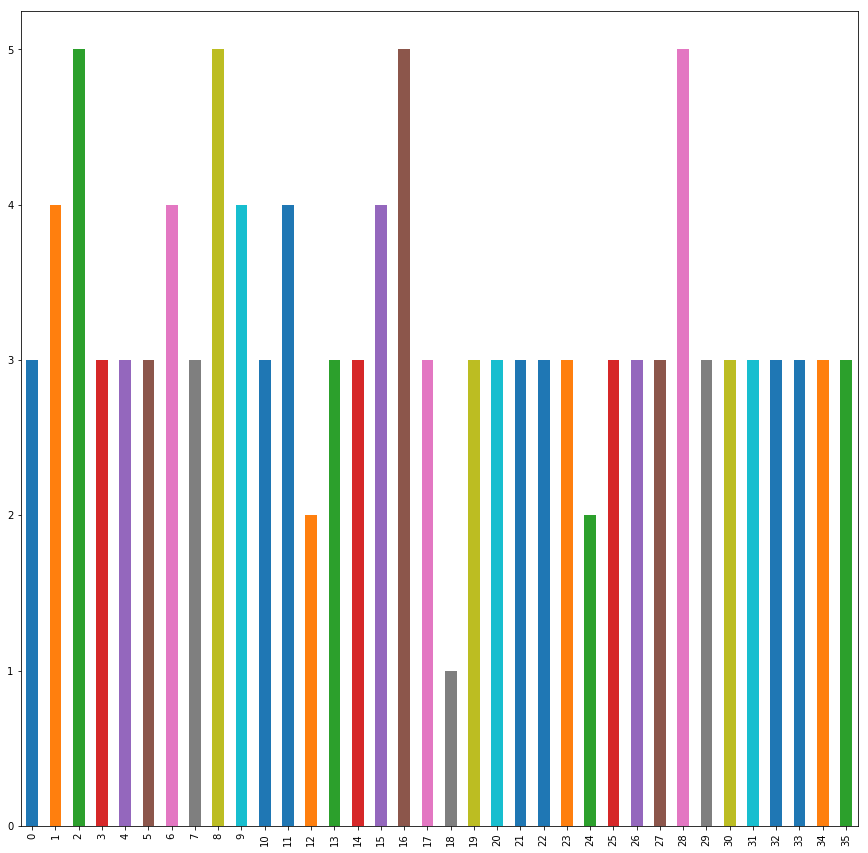

In [386]:
#bar chart of stress_ratings day by day
merged_dataset['stress_ratings'].plot(kind="bar", figsize=(15,15))

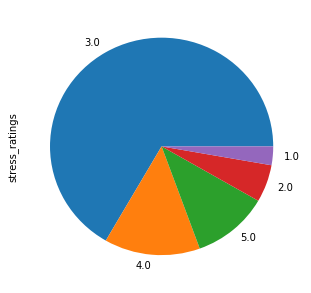

In [387]:
#pie chart of mood_ratings over a period
merged_dataset['stress_ratings'].value_counts().plot(kind="pie", figsize=(5,5))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


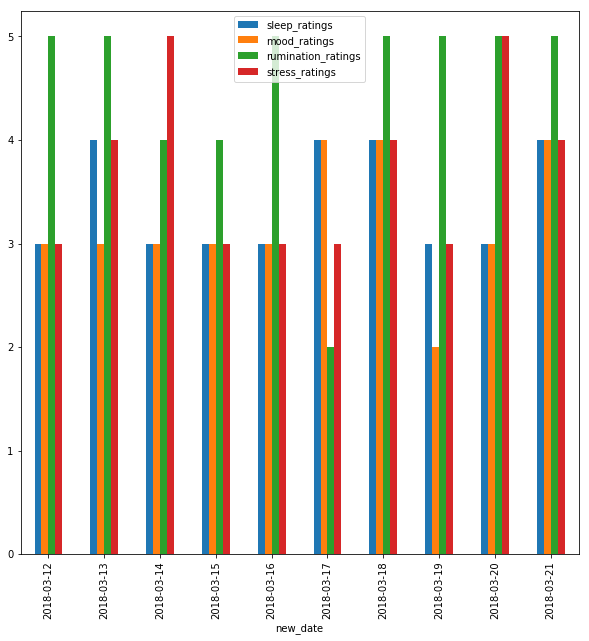

In [388]:
#bar chart of combination of all ratings day by day
merged_dataset.head(10).plot(x="new_date", y=["sleep_ratings", "mood_ratings", "rumination_ratings","stress_ratings"], kind="bar",figsize=(10,10))

Advantages That i can think of using bar charts
1) Bar-chart will be useful to identify acute changes will be best to explain the prognosis of a patient. example for prognosis stress levels are going down or we know he is getting better or not
2) Effect of medication can be identified.
3) Due to daily progress, we can identify new triggers and also non_complaint patients those who do not take medicines regularly


 Advantages that i can think of using pie-charts
1) pie-chart will be and gives information over a period of time and will be easy to analyze for the doctor and to see the general overview of the patient
2) Just by seeing the chart, doctor can analyze the state of a person overall in a month or for every two weeks
3) Also each monthly data can be compared with other months in the year with the seasonal variations can be highlighted

# Based on my research from internet and also contacted few doctors 

The additions I believe will help in understanding the person better apart from the above mentioned stress, rumination, sleep, mood. I think its better to make recordings twice a day (8am, 6pm) or thrice a day (8am, 2pm, 8pm). Thrice will be tough but twice will help to analyze better

explaining for 3 times a day The reasons I believe that are

1) Sleep always plays a major role in calming the patient or allowing him to relax. So when we take the value in the morning at 8 am when we are finding about his sleep and measuring that we will know his mental condition because of the sleep he had the night before.

2) But I think sleep masks all other parameters because if he sleeps well he is going to feel good and he might not have the riminating thoughts he had in the night because of good rest.

3) So the solution I think is to have this analysis thrice or twice a day at 8am, 2pm and 8pm if it tough doing 2 day's is better

4) That way we know how his condition is through out a day , we can identify his problem better because of the timing we can know at what time he is having obstacles that are affecting him and what changes can be made in his day.

5) I believe any ruminating thoughts he have will be better measured at 8pm or 2pm then 8 am when he wakes up and feels relaxed

6) It may be a bias if we just take it in the morning and we may not find the real reason or we may think he is fine.

secondly, we can add a questionnaire to the app and make the user to fill it twice a month
Asking him the questions 
1) Three things that make him happy, sad and annoy
2) Asking questions about disturbing colors, soothing colors, favoite past time , favorite hobbies, fav vacation, people that you like to talk to 
3) From the above things we can actually try to bring positive thinking and trying to create a positive environment for him
4) Providers might also have a better idea how to treat him from the above questions 

In future, we can group Similar hobbies people if we have huge amount of data to make them feel better


# SQLQUERY 

The above query gives total number of person finished the exercise every month divide by total number of users might and multiplying by 100 gives percentage

My knowledge on SQL query is intermediate i tried my best to answer the above query. I haven't worked on advanced queries from last 6 months. I'm good at basic and intermediate queries. This is something that i can easily catch up on doing advanced queries. spent less time on query

# Conclusion:

Pie and bar charts are good to monitor the user. mood and sleep are not helping the user from repeated thinking (rumination) and it is leading to stress. with this data there's no enough statstical inference's to draw from the dataset by gathering more ratings (twice or thrice a day) and adding a questionnaire in app from getting data from user helps us to monitor the user better. there might be different ways to monitor the user. these were my thoughts on this task. 

Thank you for taking time to reviewing my task. Looking forward to hear from you about the next steps. Thanks!
-Abhi